In [59]:
pip install openai

    extract-msg (<=0.29.*)
                 ~~~~~~~^

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
from IPython.display import Markdown, display
from openai import OpenAI
import openai
import os

openai.api_key = "your_API_key"
client = OpenAI(api_key=openai.api_key)

response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {"role": "system", "content": "You are a great philosopher."},
    {"role": "user", "content": "What is the meaning of life?"}
  ]
)
display(Markdown(response.choices[0].message.content))

The meaning of life is a question that has been pondered by philosophers, theologians, and thinkers throughout history, and it often eludes a singular answer. Various perspectives propose different meanings:

1. **Philosophical Perspectives**: Existentialists like Jean-Paul Sartre suggest that life has no inherent meaning, and it is up to each individual to create their own purpose through choices and actions. In contrast, utilitarians might argue that the meaning of life lies in maximizing happiness and reducing suffering.

2. **Religious Views**: Many religious traditions provide a framework for understanding life's purpose. For example, in Christianity, life's meaning is often found in the relationship with God and living according to His will. In Buddhism, the focus is on enlightenment and the cessation of suffering.

3. **Humanist Perspectives**: Humanism suggests that meaning can be derived from human experiences, relationships, and the pursuit of knowledge and creativity.

4. **Biological Viewpoint**: From a biological or evolutionary standpoint, one might argue that the meaning of life is to survive, reproduce, and pass on genes to future generations.

Ultimately, the meaning of life may be a deeply personal exploration, shaped by individual experiences, beliefs, and values. It could be seen as a quest for understanding one's role in the universe, connection with others, or contribution to the greater good. Each person's answer may differ based on their reflections, choices, and circumstances.

In [98]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv('./2_final_train_dataset.csv')
validation_data = pd.read_csv('./2_final_validation_dataset.csv')
test_data = pd.read_csv('./2_final_test_dataset.csv')
test_ssc_data = pd.read_csv('./2_final_social_science_test_dataset.csv')

# Define the label mapping
label_mapping = {0: "non-causal", 1: "causal"}

# Function to clean source names
def clean_source(df):
    df['source'] = df['source'].replace({
        'Pubmed data.csv': 'Pubmed',
        'Press_Release': 'Press Release'
    })
    return df

# Function to apply label mapping and clean sources
def process_dataset(df, name):
    print(f"\n{name} dataset - Unique labels BEFORE mapping: {df['label'].unique()}")
    
    # Apply label mapping
    df['label'] = df['label'].map(label_mapping)
    
    # Clean source names
    df = clean_source(df)
    
    print(f"{name} dataset - Unique labels AFTER mapping: {df['label'].unique()}")
    print(f"{name} dataset - Unique sources AFTER cleaning: {df['source'].unique()}")

    if df['label'].isnull().any():
        print(f"Warning: NaN values found in {name} dataset after mapping!")

    return df

# Process each dataset
train_data = process_dataset(train_data, "Train")
validation_data = process_dataset(validation_data, "Validation")
test_data = process_dataset(test_data, "Test")
test_ssc_data = process_dataset(test_ssc_data, "SSC Test")

# Print samples
print("\nSample rows from Train dataset:")
print(train_data.head())

print("\nSample rows from Test dataset:")
print(test_data.head())

print("\nSample rows from SSC Test dataset:")
print(test_ssc_data.head())

print("\nSample rows from Validation dataset:")
print(validation_data.head())



Train dataset - Unique labels BEFORE mapping: [1 0]
Train dataset - Unique labels AFTER mapping: ['causal' 'non-causal']
Train dataset - Unique sources AFTER cleaning: ['Haber' 'semeval' 'Pubmed' 'Press Release' 'altlex' 'ctb' 'esl2'
 'because' 'Ssc']

Validation dataset - Unique labels BEFORE mapping: [1 0]
Validation dataset - Unique labels AFTER mapping: ['causal' 'non-causal']
Validation dataset - Unique sources AFTER cleaning: ['semeval' 'Haber' 'Pubmed' 'esl2' 'because' 'altlex' 'Ssc'
 'Press Release' 'ctb']

Test dataset - Unique labels BEFORE mapping: [1 0]
Test dataset - Unique labels AFTER mapping: ['causal' 'non-causal']
Test dataset - Unique sources AFTER cleaning: ['Haber' 'Pubmed' 'esl2' 'altlex' 'ctb' 'Press Release' 'Ssc' 'because'
 'semeval']

SSC Test dataset - Unique labels BEFORE mapping: [1 0]
SSC Test dataset - Unique labels AFTER mapping: ['causal' 'non-causal']
SSC Test dataset - Unique sources AFTER cleaning: ['Ssc']

Sample rows from Train dataset:
          

In [99]:
# Adjust pandas display options to ensure full sentences are shown without truncation
pd.set_option('display.max_colwidth', None)  # Ensure long text isn't truncated
pd.set_option('display.width', None)  # Automatically adjust the width for the table to fit the content
test_data

,sentence,label,source
0,Declines in hospitalizations for childhood pneumonia were sustained during the decade after the introduction of PCV7.,causal,Haber
1,Patients with diabetes and cardiovascular disease or cardiovascular risk do not benefit from the addition of aliskiren to standard medical therapy.,causal,Pubmed
2,Î²-CTx had no significant association with DR.,causal,Pubmed
3,SEACOM cable problems may only be resolved next week Initial estimates indicate that the total SEACOM repair time will be around twelve days,causal,esl2
4,Higher moderate physical activity was statistically significantly associated with reduced cigarette smoking 6 months later,causal,Haber
...,...,...,...
3921,"However, training and experience of nurses in aromatherapy massage is critical to achieving positive results.",non-causal,Pubmed
3922,These sessions highlight selected abstracts of submitted papers in poster format .,non-causal,semeval
3923,"The movie ' s child star , Michael Stephenson , made a documentary about the movie titled ""Best Worst Movie , "" released to critical success in 2009 .",non-causal,semeval
3924,"Despite treatment advances, stroke is still a leading cause of death and disability, with older age and impaired intellectual capacity (cognitive function) before a stroke associated with higher risks of death and disability afterwards.",non-causal,Press Release


In [100]:
# train_data=train_data.head(50)
# validation_data.head(10)
# test_data=test_data.head(10)
# test_ssc_data=test_ssc_data.head(10)

In [101]:
import pandas as pd
import json
# Function to save the data into JSONL format
def save_to_jsonl(data, output_file_path):
    jsonl_data = []
    for index, row in data.iterrows():
        jsonl_data.append({
            "messages": [
                {"role": "system", "content": "Given a sentence, classify the level of causality as 'non-causal', 'causal'."},
                {"role": "user", "content": row['sentence']},
                {"role": "assistant", "content": f"\"{row['label']}\""}
            ]
        })

    # Save to JSONL format
    with open(output_file_path, 'w') as f:
        for item in jsonl_data:
            f.write(json.dumps(item) + '\n')

# Save the datasets to JSONL format (train, validation, test)
train_output_file_path = 'causality_classification_train.jsonl'
validation_output_file_path = 'causality_classification_validation.jsonl'
test_output_file_path = 'causality_classification_test.jsonl'

save_to_jsonl(train_data, train_output_file_path)
save_to_jsonl(validation_data, validation_output_file_path)
save_to_jsonl(test_data, test_output_file_path)

print(f"Training dataset saved to {train_output_file_path}")
print(f"Validation dataset saved to {validation_output_file_path}")
print(f"Test dataset saved to {test_output_file_path}")


Training dataset saved to causality_classification_train.jsonl
Validation dataset saved to causality_classification_validation.jsonl
Test dataset saved to causality_classification_test.jsonl


In [102]:
print(train_data.head())


                                                                                                                                                                                                                                      sentence  \
0                                                                                               We found no independent association of perceived discrimination with  risk of incident CV disease or HF hospitalization in this AA population.   
1                                                                                                                             Short-term side effects are uncommon , but include headache from eyestrain , nausea , agitation or nervousness .   
2                                                                                                                                                                             The presence of an in situ stent did not interfere with surgery.   
3  Compared with long and freque

In [103]:
import pandas as pd
import json

# Function to save data to JSONL format
def save_to_jsonl(data, output_file_path):
    jsonl_data = []
    for index, row in data.iterrows():
        jsonl_data.append({
            "messages": [
                {"role": "system", "content": "Given a sentence, classify the level of causality as 'non-causal', 'causal'."},
                {"role": "user", "content": row['sentence']},
                {"role": "assistant", "content": f"\"{row['label']}\""}
            ]
        })

    # Save to JSONL format
    with open(output_file_path, 'w') as f:
        for item in jsonl_data:
            f.write(json.dumps(item) + '\n')

    return jsonl_data  # Return the data to use later

# Paths to save the JSONL files
train_output_file_path = './binary_causality_classification_train.jsonl'
train_output_file_path = './binary_causality_classification_test.jsonl'
validation_output_file_path = './binary_causality_classification_val.jsonl'

# Save the training and validation datasets and store the jsonl data
train_jsonl_data = save_to_jsonl(train_data, train_output_file_path)
validation_jsonl_data = save_to_jsonl(validation_data, validation_output_file_path)
test_jsonl_data = save_to_jsonl(test_data, test_output_file_path)


# Print the first 10 sentences from the training dataset
for i, item in enumerate(test_jsonl_data[:10]):
    print(f"Sentence {i + 1}: {item['messages'][1]['content']}, Label: {item['messages'][2]['content']}")


Sentence 1: Declines in hospitalizations for childhood pneumonia were sustained during the decade after the introduction of PCV7., Label: "causal"
Sentence 2: Patients with diabetes and cardiovascular disease or cardiovascular risk do not benefit from the addition of aliskiren to standard medical therapy., Label: "causal"
Sentence 3: Î²-CTx had no significant association with DR. , Label: "causal"
Sentence 4: SEACOM cable problems may only be resolved next week Initial estimates indicate that the total SEACOM repair time will be around twelve days, Label: "causal"
Sentence 5: Higher moderate physical activity was statistically significantly associated with reduced cigarette smoking 6 months later, Label: "causal"
Sentence 6: Among Medicare beneficiaries in intervention communities, compared with those in uninvolved communities, all-cause 30-day rehospitalization and all-cause hospitalization declined, Label: "causal"
Sentence 7: The use of healthcare today is associated with an increas

In [104]:
# Calculate the counts and percentages of each label in the training set
train_label_counts = train_data['label'].value_counts()
train_label_percentages = train_data['label'].value_counts(normalize=True) * 100

test_label_counts = test_data['label'].value_counts()
test_label_percentages = test_data['label'].value_counts(normalize=True) * 100

# Calculate the counts and percentages of each label in the validation set
validation_label_counts = validation_data['label'].value_counts()
validation_label_percentages = validation_data['label'].value_counts(normalize=True) * 100

# Create a DataFrame that combines both counts and percentages
label_distribution_df = pd.DataFrame({
    "Training Set (Count)": train_label_counts,
    "Training Set (%)": train_label_percentages,
    "Test Set (Count)": test_label_counts,
    "Test Set (%)": test_label_percentages,
    "Validation Set (Count)": validation_label_counts,
    "Validation Set (%)": validation_label_percentages
}).fillna(0)  # Fill NaNs with 0 in case some labels are missing from validation

# Round the percentages to two decimal places
label_distribution_df = label_distribution_df.round(2)

# Print the DataFrame
print(label_distribution_df)


            Training Set (Count)  Training Set (%)  Test Set (Count)  \
label                                                                  
causal                      6868              50.0              1963   
non-causal                  6868              50.0              1963   

            Test Set (%)  Validation Set (Count)  Validation Set (%)  
label                                                                 
causal              50.0                     981                50.0  
non-causal          50.0                     981                50.0  


Average sentence length (in words): 24.20


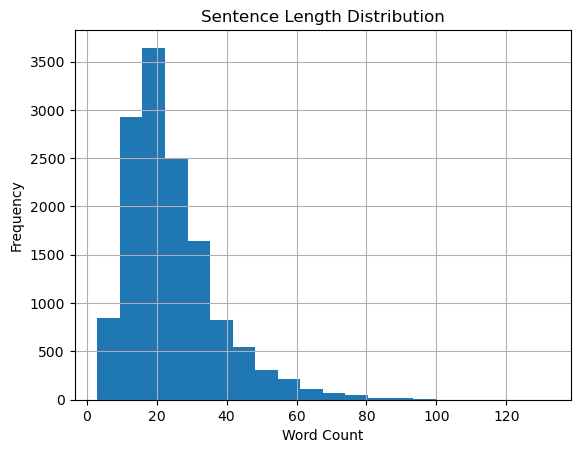

In [105]:
import matplotlib.pyplot as plt
train_data['sentence_length'] = train_data['sentence'].apply(lambda x: len(x.split()))
average_length = train_data['sentence_length'].mean()
print(f"Average sentence length (in words): {average_length:.2f}")


train_data['sentence_length'].hist(bins=20)
plt.title('Sentence Length Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


In [106]:
from openai import OpenAI
import openai
openai.api_key = "your_API_key"
client = OpenAI(api_key=openai.api_key)

In [107]:
train_file = client.files.create(
  file=open(train_output_file_path, "rb"),
  purpose="fine-tune"
)

valid_file = client.files.create(
  file=open(validation_output_file_path, "rb"),
  purpose="fine-tune"
)

print(f"Training file Info: {train_file}")
print(f"Validation file Info: {valid_file}")

Training file Info: FileObject(id='file-Jh6YGRs9GT4djgmxF1wbZz', bytes=4887144, created_at=1738409112, filename='binary_causality_classification_test.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)
Validation file Info: FileObject(id='file-1uaeiA9MYbEgKKSZsvVvHX', bytes=695617, created_at=1738409113, filename='binary_causality_classification_val.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)


In [108]:
model = client.fine_tuning.jobs.create(
  training_file=train_file.id, 
  validation_file=valid_file.id,
  model="gpt-4o-mini-2024-07-18", 
  hyperparameters={
    "n_epochs": 1,
    "batch_size": 256,
    "learning_rate_multiplier": 0.5
  }
)
job_id = model.id
status = model.status

print(f'Fine-tuning model with jobID: {job_id}.')
print(f"Training Response: {model}")
print(f"Training Status: {status}")

Fine-tuning model with jobID: ftjob-IkFnXPvfrgRURAhI6bYqRWH3.
Training Response: FineTuningJob(id='ftjob-IkFnXPvfrgRURAhI6bYqRWH3', created_at=1738409115, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs=1, batch_size=256, learning_rate_multiplier=0.5), model='gpt-4o-mini-2024-07-18', object='fine_tuning.job', organization_id='org-2ZKv8wmk8FOFjhNffETHIztK', result_files=[], seed=587430131, status='validating_files', trained_tokens=None, training_file='file-Jh6YGRs9GT4djgmxF1wbZz', validation_file='file-1uaeiA9MYbEgKKSZsvVvHX', estimated_finish=None, integrations=[], user_provided_suffix=None, method={'type': 'supervised', 'supervised': {'hyperparameters': {'batch_size': 256, 'learning_rate_multiplier': 0.5, 'n_epochs': 1}}})
Training Status: validating_files


In [109]:
# Retrieve the state of a fine-tune
client.fine_tuning.jobs.retrieve(job_id)

FineTuningJob(id='ftjob-IkFnXPvfrgRURAhI6bYqRWH3', created_at=1738409115, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs=1, batch_size=256, learning_rate_multiplier=0.5), model='gpt-4o-mini-2024-07-18', object='fine_tuning.job', organization_id='org-2ZKv8wmk8FOFjhNffETHIztK', result_files=[], seed=587430131, status='validating_files', trained_tokens=None, training_file='file-Jh6YGRs9GT4djgmxF1wbZz', validation_file='file-1uaeiA9MYbEgKKSZsvVvHX', estimated_finish=None, integrations=[], user_provided_suffix=None, method={'type': 'supervised', 'supervised': {'hyperparameters': {'n_epochs': 1, 'batch_size': 256, 'learning_rate_multiplier': 0.5}}})

In [110]:
# Cancel a job
#client.fine_tuning.jobs.cancel(job_id)

In [112]:
result = client.fine_tuning.jobs.list()

# Retrieve the fine tuned model
fine_tuned_model = result.data[0].fine_tuned_model
print(fine_tuned_model)

ft:gpt-4o-mini-2024-07-18:eindhoven-university-of-technology::Aw6EaimF


In [85]:
# fine_tuned_model="ft:gpt-4o-mini-2024-07-18:eindhoven-university-of-technology::Aa19LB2C"

In [113]:
completion = client.chat.completions.create(
  model = fine_tuned_model,
  messages=[
    {
      "role": "system",
      "content": "You are tasked with analyzing the level of causality present in a given sentence. Classify the relationship as one of the following: 'non causal', 'causal'."
    },
    {
      "role": "user",
      "content": "Preterm and early term birth are strong risk factors for the development of CKD from childhood into mid-adulthood."
    }
  ]
)
print(completion.choices[0].message.content)

"causal"


In [197]:
# fine_tuned_model = "ft:gpt-4o-mini-2024-07-18:eindhoven-university-of-technology::Aa0Y91NK"

In [ ]:
ft:gpt-4o-mini-2024-07-18:eindhoven-university-of-technology::Aa19LB2C


In [123]:
# Delete a fine-tuned model (must be an owner of the org the model was created in)
#client.models.delete(fine_tuned_model)

In [114]:
def predict(test, model):
    y_pred = []
    categories = ["non-causal", "causal"]

    for index, row in test.iterrows():
        response = client.chat.completions.create(
            model=fine_tuned_model,
            messages=[
                {
                    
                    "role": "system",
                    "content": "You are tasked with analyzing the level of causality present in a given sentence. Classify the relationship as one of the following: 'non-causal', 'causal'."
                },
                {"role": "user", "content": row["sentence"]},
            ],
        )

        answer = response.choices[0].message.content

        # Determine the predicted category
        for category in categories:
            if category.lower() in answer.lower():
                y_pred.append(category)
                break
        else:
            y_pred.append("none")  # In case none of the expected categories are found in the answer

    return y_pred


In [169]:
# y_pred = predict(validation_data, "gpt-4o-mini-2024-07-18")
# y_true = validation_data["label"]
# evaluate(y_true, y_pred)

In [115]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate(y_true, y_pred, data, output_csv_path="misclassified_sentences.csv"):
    # Define the causality labels
    labels = ["non-causal", "causal"]
    
    # Create a mapping from label to index
    mapping = {label: idx for idx, label in enumerate(labels)}

    def map_func(x):
        return mapping.get(x, -1)  # Map to -1 if not found, though this should not happen

    # Map y_true and y_pred to their corresponding indices
    y_true_mapped = np.vectorize(map_func)(y_true)
    y_pred_mapped = np.vectorize(map_func)(y_pred)

    # Calculate overall accuracy
    accuracy = accuracy_score(y_true=y_true_mapped, y_pred=y_pred_mapped)
    print(f"Overall Accuracy: {accuracy:.3f}")

    # Find misclassified examples
    misclassified_indices = [i for i in range(len(y_true_mapped)) if y_true_mapped[i] != y_pred_mapped[i]]
    misclassified_data = data.iloc[misclassified_indices].copy()
    
    # Add True Label and Predicted Label columns
    misclassified_data['True Label'] = y_true.iloc[misclassified_indices]
    misclassified_data['Predicted Label'] = [labels[pred] for pred in y_pred_mapped[misclassified_indices]]

    misclassified_data = misclassified_data[['sentence','True Label', 'Predicted Label', 'source']]

    # Save misclassified sentences (only True and Predicted labels) to CSV
    misclassified_data.to_csv(output_csv_path, index=False)
    print(f"Misclassified sentences saved to {output_csv_path}")

    # Plot confusion matrix
    conf_matrix = confusion_matrix(
        y_true=y_true_mapped,
        y_pred=y_pred_mapped,
        labels=list(range(len(labels)))
    )

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Generate the classification report
    class_report = classification_report(
        y_true=y_true_mapped,
        y_pred=y_pred_mapped,
        target_names=labels,
        labels=list(range(len(labels)))
    )
    print("\nClassification Report:")
    print(class_report)

Overall Accuracy: 0.755
Misclassified sentences saved to misclassified_sentences.csv


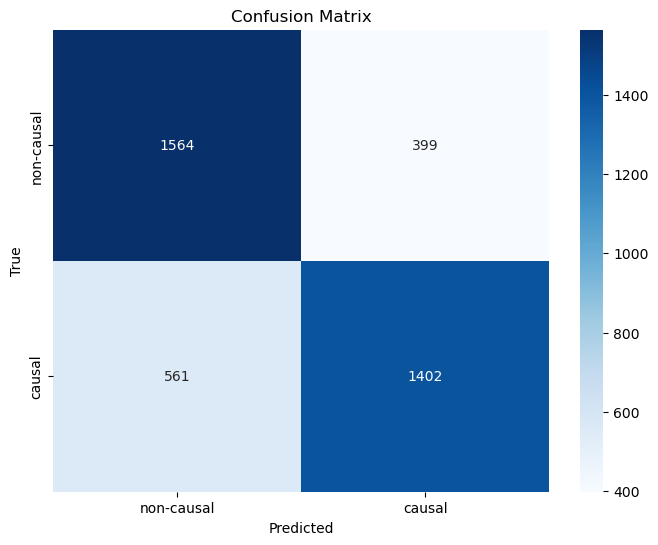


Classification Report:
              precision    recall  f1-score   support

  non-causal       0.74      0.80      0.77      1963
      causal       0.78      0.71      0.74      1963

    accuracy                           0.76      3926
   macro avg       0.76      0.76      0.76      3926
weighted avg       0.76      0.76      0.76      3926



In [119]:
y_pred = predict(test_data, fine_tuned_model)
y_true = test_data["label"]

# Call evaluate function
evaluate(y_true, y_pred, test_data)

Overall Accuracy: 0.693
Misclassified sentences saved to misclassified_sentences.csv


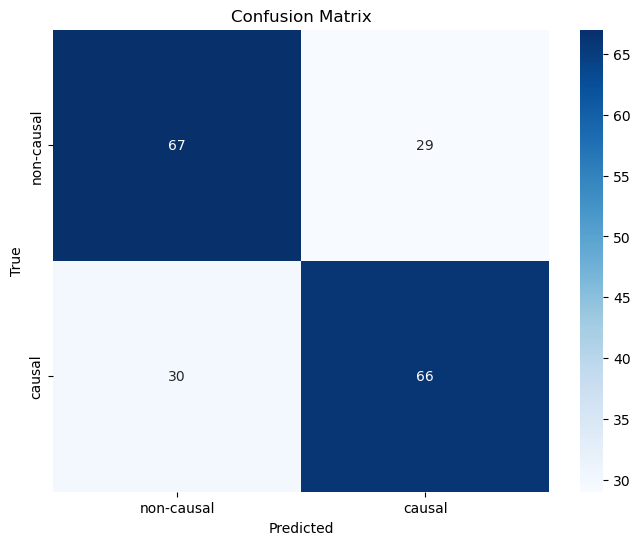


Classification Report:
              precision    recall  f1-score   support

  non-causal       0.69      0.70      0.69        96
      causal       0.69      0.69      0.69        96

    accuracy                           0.69       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.69      0.69      0.69       192



In [116]:
y_pred = predict(test_ssc_data, fine_tuned_model)
y_true = test_ssc_data["label"]

# Call evaluate function
evaluate(y_true, y_pred, test_ssc_data)

In [117]:
y_true.unique()

array(['causal', 'non-causal'], dtype=object)

In [93]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate(y_true, y_pred, data, output_csv_path="misclassified_sentences_ssc.csv"):
    # Define the causality labels
    labels = ["non-causal", "causal"]
    
    # Create a mapping from label to index
    mapping = {label: idx for idx, label in enumerate(labels)}

    def map_func(x):
        return mapping.get(x, -1)  # Map to -1 if not found, though this should not happen

    # Map y_true and y_pred to their corresponding indices
    y_true_mapped = np.vectorize(map_func)(y_true)
    y_pred_mapped = np.vectorize(map_func)(y_pred)

    # Calculate overall accuracy
    accuracy = accuracy_score(y_true=y_true_mapped, y_pred=y_pred_mapped)
    print(f"Overall Accuracy: {accuracy:.3f}")

    # Find misclassified examples
    misclassified_indices = [i for i in range(len(y_true_mapped)) if y_true_mapped[i] != y_pred_mapped[i]]
    misclassified_data = data.iloc[misclassified_indices].copy()
    
    # Add True Label and Predicted Label columns
    misclassified_data['True Label'] = y_true.iloc[misclassified_indices]
    misclassified_data['Predicted Label'] = [labels[pred] for pred in y_pred_mapped[misclassified_indices]]

    misclassified_data = misclassified_data[['sentence','True Label', 'Predicted Label', 'source']]

    # Save misclassified sentences (only True and Predicted labels) to CSV
    misclassified_data.to_csv(output_csv_path, index=False)
    print(f"Misclassified sentences saved to {output_csv_path}")

    # Plot confusion matrix
    conf_matrix = confusion_matrix(
        y_true=y_true_mapped,
        y_pred=y_pred_mapped,
        labels=list(range(len(labels)))
    )

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Generate the classification report
    class_report = classification_report(
        y_true=y_true_mapped,
        y_pred=y_pred_mapped,
        target_names=labels,
        labels=list(range(len(labels)))
    )
    print("\nClassification Report:")
    print(class_report)

Overall Accuracy: 1.000
Misclassified sentences saved to misclassified_sentences_ssc.csv


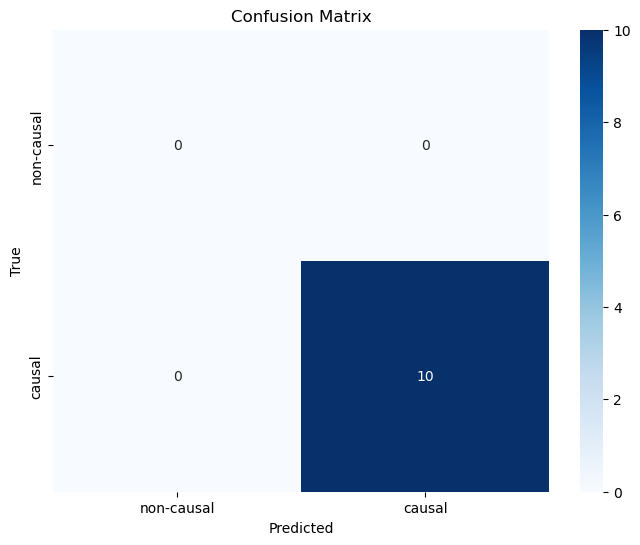


Classification Report:
              precision    recall  f1-score   support

  non-causal       0.00      0.00      0.00         0
      causal       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       0.50      0.50      0.50        10
weighted avg       1.00      1.00      1.00        10



C:\Users\tessa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tessa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tessa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tessa\anaconda3\Lib\site-package

In [94]:
y_pred = predict(test_ssc_data, fine_tuned_model)
y_true = test_ssc_data["label"]

# Call evaluate function
evaluate(y_true, y_pred, test_ssc_data)

In [95]:
misclassified_data_ssc = pd.read_csv("misclassified_sentences_ssc.csv")

misclassified_data_ssc

,sentence,True Label,Predicted Label,source


In [96]:
misclassified_data = pd.read_csv("misclassified_sentences.csv")

misclassified_data

,sentence,True Label,Predicted Label,source


In [57]:
import pandas as pd

# Load the misclassified sentences dataset
misclassified_data = pd.read_csv("misclassified_sentences.csv")

# Load the source dataset
sci_data = pd.read_csv("sci_2_test_dataset_balanced.csv")

# Ensure the 'sentence' columns are cleaned, if necessary
misclassified_data_unique = misclassified_data[['sentence', 'True Label', 'Predicted Label']]  # Select the relevant columns
sci_data_unique = sci_data[['sentence', 'source']]  # Select the 'sentence' and 'source' columns

# Remove duplicates in the source data based on 'sentence', keep only the first occurrence
sci_data_unique = sci_data_unique.drop_duplicates(subset=['sentence'], keep='first')

# Merge the unique misclassified sentences with the source information based on the 'sentence' column
merged_with_source = pd.merge(misclassified_data_unique, sci_data_unique, on='sentence', how='inner')

# Ensure that the original index is preserved (by merging on the index as well)
merged_with_source['index'] = merged_with_source.index

# Set the index back to the original misclassified data index
merged_with_source.set_index('index', inplace=True)

# Verify the number of misclassified sentences after merging and removing duplicates
print(f"Number of misclassified sentences after merge: {len(merged_with_source)}")  # This should output 2400 or close

# Save the updated DataFrame with the 'source' column to a new CSV file
merged_with_source.to_csv("misclassified_sentences_with_source.csv", index=True)

# Display the first few rows to verify the results
print(merged_with_source.head())


Number of misclassified sentences after merge: 2421
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           sentence  \
index                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [58]:
merged_with_source

,sentence,True Label,Predicted Label,source
index,,,,
0,"Mild PTSD symptoms are common in patients with lung cancer 6 months after treatment; however, a full diagnosis of PTSD is uncommon.",causal,non-causal,Pubmed
1,"South Africa : P2P Control Helps Overcome Undersea Cable Outage ""The SEACOM undersea cable , which provides a data link between South Africa , Europe and India , experienced downtime beginning on Saturday 8 October 2011 , caused by a problem on a cable between Abu Talat ( Egypt ) and Marseilles ( France ) . .",causal,non-causal,esl2
2,"South Africa : P2P Control Helps Overcome Undersea Cable Outage ""The SEACOM undersea cable , which provides a data link between South Africa , Europe and India , experienced downtime beginning on Saturday 8 October 2011 , caused by a problem on a cable between Abu Talat ( Egypt ) and Marseilles ( France ) . .",causal,non-causal,esl2
3,"South Africa : P2P Control Helps Overcome Undersea Cable Outage ""The SEACOM undersea cable , which provides a data link between South Africa , Europe and India , experienced downtime beginning on Saturday 8 October 2011 , caused by a problem on a cable between Abu Talat ( Egypt ) and Marseilles ( France ) . .",causal,non-causal,esl2
4,"First came the shooting : an armed teenager killed by police officers on a darkened Brooklyn street . Then came the anger : a Monday evening vigil marred by an unruly young mob thrashing its way through local businesses ; a second protest the next night ; and another on Wednesday night , after which , the police said , someone hit an officer in the face with a brick , another brick was thrown through the window of a police van , and there were 46 arrests — mostly for disorderly conduct .",causal,non-causal,esl2
...,...,...,...,...
2416,"The luxury airline and casino company, 98.6 % - owned by investor Kirk Kerkorian and his Tracinda Corp., earlier this month announced its agreements to acquire the properties, but didn't disclose the purchase price.",non-causal,causal,ctb
2417,"The new onset GERD detected on scintigraphy may not be pathologic as there is a decrease in total acid production postsurgery; however, it still remains an important issue and needs long-term follow-up.",non-causal,causal,Pubmed
2418,"The document is about illegal drugs , which , it claims , are illegal because they are harmful .",non-causal,causal,semeval


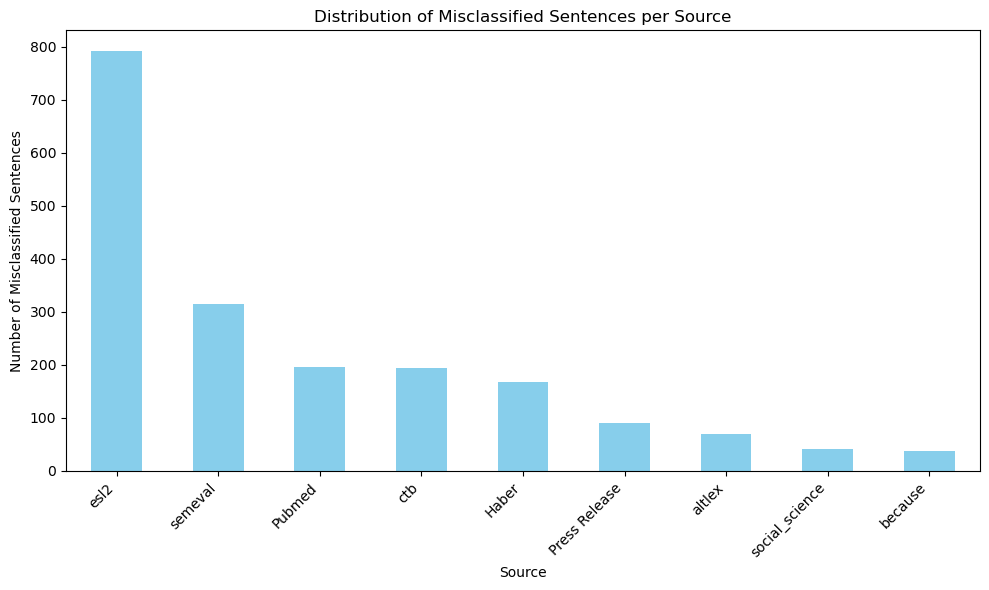

In [231]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged data with the 'source' column
merged_with_source = pd.read_csv("misclassified_sentences_with_source.csv")

# Plot the distribution of misclassified sentences per source
plt.figure(figsize=(10,6))
merged_with_source['source'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Misclassified Sentences per Source")
plt.xlabel("Source")
plt.ylabel("Number of Misclassified Sentences")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()s

# Evaluation
* Longer and more complex sentences tend to obfuscate the main causal relationships. The use of multiple clauses or technical jargon can make it difficult to discern causality.
* Many of these sentences include statistical results that may not clearly indicate direct causal relationships, making classification more challenging
* Terms like "associated with" can imply causality but do not establish it definitively. The word "associated" can lead to misinterpretation as "causal" when it lacks clarity on the nature of the relationship.
  

In [232]:
import pandas as pd

file_path = 'ssc_train.csv'  # Adjust the file path as needed

# Read lines from the file
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Initialize lists to hold cleaned sentences and labels
cleaned_sentences = []
cleaned_labels = []

# Process each line to extract sentences and labels
header_found = False  # Flag to track if we have encountered the header

for line in lines:
    line = line.strip()
    if line and not line.startswith('sentence,label'):  # Ignore header
        # Skip the first line if it's a header
        if not header_found:
            header_found = True
            continue
        
        # Attempt to split at the last comma to separate sentence from label
        parts = line.rsplit(',', 1)  # Split from the right at the last comma
        if len(parts) == 2:
            sentence = parts[0].strip()  # Extract the sentence
            label = parts[1].strip()      # Extract the label
            
            # Clean the label to remove unwanted characters
            cleaned_labels.append(label.split(';')[0])  # Keep only the first part before any semicolon
            cleaned_sentences.append(sentence)

# Create a DataFrame from the cleaned data
val_data = pd.DataFrame({
    'sentence': cleaned_sentences,
    'label': cleaned_labels
})

# Optionally, save the cleaned DataFrame to a new CSV file
val_data.to_csv('val_data.csv', index=False)

print("Data cleaned and saved successfully.")


Data cleaned and saved successfully.


In [233]:
# Adjust pandas display options to ensure full sentences are shown without truncation
pd.set_option('display.max_colwidth', None)  # Ensure long text isn't truncated
pd.set_option('display.width', None)  # Automatically adjust the width for the table to fit the content
val_data

,sentence,label
0,Permitting continuous rather than binary ''all-or-nothing'' contributions significantly increases contributions and facilitates provision.,1
1,Another point worth noting is that the common resource dilemma paradigm we used was a single-trial setting.,0
2,Outcome Matrix Applied to Each Round of the N-person Prisoner's Dilemma Game,0
3,It is thus necessary to control for individuals' attitudes toward risk. 3,0
4,"""Conversely, when switching from short games to long games, participants immediately begin to cooperate at a high level.""",1
...,...,...
697,"""This finding is reminiscent of Sniderman et al. (2004), which found that perceived threat to safety was the least important predictor of hostility towards immigrants in the Netherlands.""",0
698,The inclusion of asynchrony allowed a player to act independently of his opponent; this provided an opportunity to double-cross him.,1
699,"""Variations on these early dominant strategy public goods games have been conducted in the laboratory under many different assumptions about utility functions and technology, different subject pools, asymmetric endowments and preferences, different information conditions, different public good mechanisms, variable group sizes, and so forth.""",0
700,"""The second insight is that the inefficiency observed in heterogeneous groups is not only due to the inefficiently low levels of contribution, but also due to a relative underuse of rewards.""",1


In [237]:
import pandas as pd

# Assuming final_data is your DataFrame from previous steps
data = val_data

# Check for NaN entries in the DataFrame
nan_entries = data[data.isna().any(axis=1)]

# Print the NaN entries if any exist
if not nan_entries.empty:
    print("Entries with NaN values:")
    print(nan_entries)
else:
    print("No NaN values found in the dataset.")

# Clean up and ensure we're using the correct columns: 'sentence' and 'label'
data_cleaned = data[['sentence', 'label']]

# Additional cleaning for labels to ensure they are valid
data_cleaned['label'] = data_cleaned['label'].str.replace(';', '', regex=True)  # Remove semicolons
data_cleaned['label'] = data_cleaned['label'].str.strip()  # Strip whitespace

# Check again for NaN values after cleaning
nan_entries_after_cleaning = data_cleaned[data_cleaned['label'].isna()]

# Print the NaN entries after cleaning
if not nan_entries_after_cleaning.empty:
    print("Entries with NaN values after cleaning:")
    print(nan_entries_after_cleaning)
else:
    print("No NaN values found after cleaning.")

# Convert labels to numeric values
data_cleaned['label'] = pd.to_numeric(data_cleaned['label'], errors='coerce')  # Convert to numeric, coercing errors to NaN

# Drop any remaining NaN values
data_cleaned.dropna(inplace=True)

# Shuffle the entire dataset to ensure randomness
data_cleaned = data_cleaned.sample(frac=1, random_state=42).reset_index(drop=True)

# Define the label mapping for the classes
label_mapping = {
    0: "non-causal",
    1: "causal"
}
data_cleaned['label'] = data_cleaned['label'].map(label_mapping)

# Check the final DataFrame before splitting
print(data_cleaned.head())

# Split the data into training and validation sets (80% train, 20% validation) with stratification
train_data, validation_data = train_test_split(
    data_cleaned, 
    test_size=0.2, 
    random_state=42, 
    stratify=data_cleaned['label']  # Ensures equal distribution of classes
)

# Function to save the data into JSONL format
def save_to_jsonl(data, output_file_path):
    jsonl_data = []
    for index, row in data.iterrows():
        jsonl_data.append({
            "messages": [
                {"role": "system", "content": "Given a sentence, classify the level of causality as 'non-causal', 'causal'."},
                {"role": "user", "content": row['sentence']},
                {"role": "assistant", "content": f"\"{row['label']}\""}
            ]
        })

    # Save to JSONL format
    with open(output_file_path, 'w') as f:
        for item in jsonl_data:
            f.write(json.dumps(item) + '\n')

    return jsonl_data  # Return the data to use later

# Save the training and validation sets to separate JSONL files
train_output_file_path = 'causality_classification_train2.jsonl'
validation_output_file_path = 'causality_classification_validation2.jsonl'

save_to_jsonl(train_data, train_output_file_path)
save_to_jsonl(validation_data, validation_output_file_path)

print(f"Training dataset saved to {train_output_file_path}")
print(f"Validation dataset saved to {validation_output_file_path}")


No NaN values found in the dataset.
No NaN values found after cleaning.
                                                                                                                                                                                                                                                                                                                                                                                          sentence  \
0  "Participants were allowed to discuss their decisions with the other group members for up to three-minutes, three times during the task, namely, prior to trials 1, 4, and 7. Communication among group members frequently occurs in real-work settings, and has been shown to promote cooperation in social dilemma situations (e.g., Kerr & Kaufman-Gilliland, 1994;Komorita & Parks, 1995)."   
1                                                                                                                                                   

In [238]:
import pandas as pd
# Save the training and validation sets and store the jsonl data
train_jsonl_data = save_to_jsonl(train_data, train_output_file_path)
validation_jsonl_data = save_to_jsonl(validation_data, validation_output_file_path)

# Print the first 10 sentences from the training dataset
for i, item in enumerate(train_jsonl_data[:10]):
    print(f"Sentence {i + 1}: {item['messages'][1]['content']}, Label: {item['messages'][2]['content']}")
# Calculate the counts and percentages of each label in the training set
train_label_counts = train_data['label'].value_counts()
train_label_percentages = train_data['label'].value_counts(normalize=True) * 100

# Calculate the counts and percentages of each label in the validation set
validation_label_counts = validation_data['label'].value_counts()
validation_label_percentages = validation_data['label'].value_counts(normalize=True) * 100

# Create a DataFrame that combines both counts and percentages
label_distribution_df = pd.DataFrame({
    "Training Set (Count)": train_label_counts,
    "Training Set (%)": train_label_percentages,
    "Validation Set (Count)": validation_label_counts,
    "Validation Set (%)": validation_label_percentages
}).fillna(0)  # Fill NaNs with 0 in case some labels are missing from validation

# Round the percentages to two decimal places
label_distribution_df = label_distribution_df.round(2)

# Print the DataFrame
print(label_distribution_df)


Sentence 1: "In the computer conditions, the experimenter took the participant to a second room and seated him or her in front of a computer workstation with a 21-in.", Label: "non-causal"
Sentence 2: "Individual-scale variables like wealth and education may affect the costs of public goods provisioning or the benefits of short-term defection, and so wealthier and more educated individuals who can obtain resources more readily can expect to be more generous.", Label: "causal"
Sentence 3: Isaac and Walker (1988b) present experimental evidence that the ability to talk among group members participating in a public goods game leads to increased cooperation in the form of higher contributions and lower free-riding., Label: "causal"
Sentence 4: "Alternatively, motivational factors may diminish children's cooperative reasoning and actions in the face of personal costs.", Label: "causal"
Sentence 5: The type of prisoner's dilemma game influenced the strength of the observed correlation between

In [239]:
validation_data

,sentence,label
94,The results show that cooperation was higher when people could leave bad partners versus when they could not.,causal
175,Our results show that social ties between group members influence both cooperation and norm enforcement -creating substantial differences between M G and SG.,causal
528,In the absence of social interaction this graph should fluctuate around 0; instead we observe a very strong positive relationship between (c 1 i − c 2 i ) and (g 1 i − g 2 i ) with observations lying almost exactly on the 45 • line.,non-causal
369,"""When groups contributed more than 125 total tokens, efficiency was reduced because contributions over the minimum were not returned to individuals and were thus wasted.""",causal
83,"""This finding is reminiscent of Sniderman et al. (2004), which found that perceived threat to safety was the least important predictor of hostility towards immigrants in the Netherlands.""",non-causal
...,...,...
306,"""We found that communication still improves group performance even with increased difficulties in communication and limited information about the resource, but the level of benefit for having communication is reduced.""",causal
612,"""Thus even if the correlation between first-and second-mover choices is best explained by a consensus effect, a complete explanation of the data will require some preference element that rationalizes second-mover cooperation.""",non-causal
187,"""Hypothesis 1b: In fragmented villages, there will be higher frequencies of cooperation in H-H/M-M than in H-M.""",non-causal
525,The fact that the cooperative robot always followed through with the stated intent should have enhanced the perception of it as trustworthy.,causal


(141, 3)
   index  \
0     94   
1    175   
2    528   
3    369   
4     83   

                                                                                                                                                                                                                                   sentence  \
0                                                                                                                             The results show that cooperation was higher when people could leave bad partners versus when they could not.   
1                                                                             Our results show that social ties between group members influence both cooperation and norm enforcement -creating substantial differences between M G and SG.   
2  In the absence of social interaction this graph should fluctuate around 0; instead we observe a very strong positive relationship between (c 1 i − c 2 i ) and (g 1 i − g 2 i ) with observations lyin

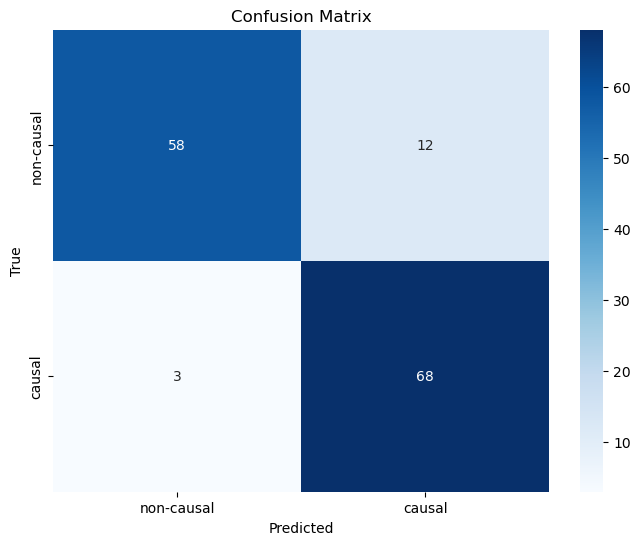


Classification Report:
              precision    recall  f1-score   support

  non-causal       0.95      0.83      0.89        70
      causal       0.85      0.96      0.90        71

    accuracy                           0.89       141
   macro avg       0.90      0.89      0.89       141
weighted avg       0.90      0.89      0.89       141



In [241]:
# Check the content and structure
print(validation_data.shape)  # Check number of rows and columns
print(validation_data.head())  # Preview the first few rows

# Check for NaN values
print(validation_data.isnull().sum())

# Reset the index to maintain original index as a column if needed
validation_data.reset_index(drop=False, inplace=True)  # Keeps the original index as a new column

y_true = validation_data['label']
y_pred = predict(validation_data, "ft:gpt-4o-mini-2024-07-18:eindhoven-university-of-technology::AOlptLOG")

# Ensure the lengths align before evaluating
print("y_true length:", len(y_true))
print("y_pred length:", len(y_pred))

# Call the evaluation function with proper inputs
evaluate(y_true.values, y_pred, validation_data)


In [244]:
import pandas as pd

# Assuming y_true, y_pred, and haber_validation are defined

# Identify misclassified indices
misclassified_indices = [i for i in range(len(y_true)) if y_true[i] != y_pred[i]]

# Create a DataFrame for misclassified sentences
misclassified_data = validation_data.iloc[misclassified_indices].copy()

# Add true and predicted labels
misclassified_data['True Label'] = [y_true[i] for i in misclassified_indices]
misclassified_data['Predicted Label'] = [y_pred[i] for i in misclassified_indices]

# Optionally, you can reorder the columns for better readability
misclassified_data = misclassified_data[['sentence', 'True Label', 'Predicted Label']]

# Save the DataFrame to a CSV file if needed
misclassified_data.to_csv('misclassified_sentences.csv', index=False)
misclassified_data

,sentence,True Label,Predicted Label
4,"""This finding is reminiscent of Sniderman et al. (2004), which found that perceived threat to safety was the least important predictor of hostility towards immigrants in the Netherlands.""",non-causal,causal
5,"""This interpretation was supported by the results of Study 2, which directly tested subgroup reputation as a moderating influence on organizational identification.""",non-causal,causal
14,"""Also, when all four fish approached the predator together, it became clear to the observer that they not only approached the predator as synchronized pairs but also initiated flight in pairwise synchronization.""",non-causal,causal
35,"""Heart rate deceleration is a classic physiological index of the orienting response (Graham, 1979).""",non-causal,causal
42,"""However, if the responder rejected the proposal, neither participant would earn any money.""",non-causal,causal
43,The upshot of this discussion is that any equilibrium with co # 0 implies using almost no communication (separation of types) in the first stage.,non-causal,causal
59,The groups convened in separate adjacent classrooms to prevent communication between groups.,causal,non-causal
61,Each instruction was given by a tape recorder to minimize the interaction between subjects and experimenters.,causal,non-causal
85,"""In our opinion, the easiest and most parsimonious way to take them into account in our experiment is by asking directly about satisfaction with other players' behaviour in the CPRG and testing how much it matters vis-à-vis objective characteristics in the second TG.""",non-causal,causal
98,"""Hence, we propose that darkness should only promote cooperativeness when the interaction partner also cooperates.""",non-causal,causal


# Evaluation
* non causal as causal
    * Descriptive and Contextual Language: Many of these sentences provide context or describe findings without making direct causal claims. For example:"This finding is reminiscent of Sniderman et al. (2004), which found that perceived threat to safety was the least important predictor of hostility towards immigrants in the Netherlands."
    * Ambiguous Terms: Phrases like "associated with" or "supported by" often imply a relationship but do not explicitly establish causation.
    * Conditional Language: Some sentences (e.g., "However, if the responder rejected the proposal, neither participant would earn any money.") imply conditions rather than causality, which may mislead the model.
* causal as non causal
    * Statistical and Observational Language: These sentences may present results or observations that the model fails to recognize as indicative of causality:"The groups convened in separate adjacent classrooms to prevent communication between groups."
    * Theoretical Constructs: Phrases that describe theoretical frameworks or frameworks for behavior, such as "Clearly, the salience of social categories may be important..." could lead to misinterpretation of their causal implications


Overall Accuracy: 0.608


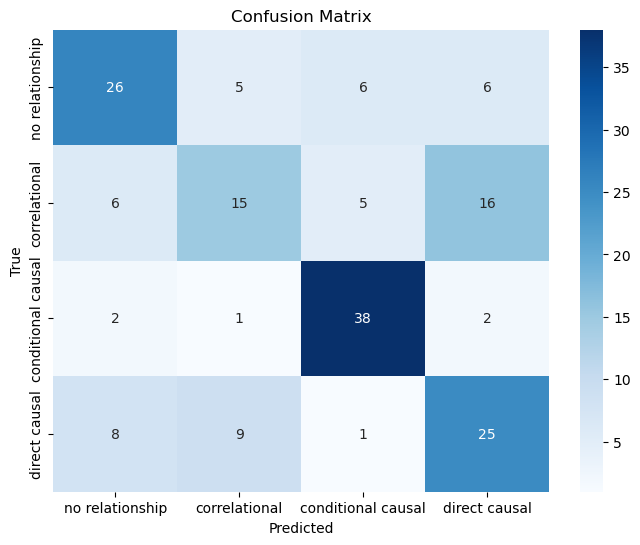


Classification Report:
                    precision    recall  f1-score   support

   no relationship       0.62      0.60      0.61        43
     correlational       0.50      0.36      0.42        42
conditional causal       0.76      0.88      0.82        43
     direct causal       0.51      0.58      0.54        43

          accuracy                           0.61       171
         macro avg       0.60      0.61      0.60       171
      weighted avg       0.60      0.61      0.60       171



In [119]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Global variable to store the misclassified table
global_misclassified_table = None

def evaluate(y_true, y_pred, data):
    global global_misclassified_table  # Declare the global variable
    
    # Define the four causality labels
    labels = ["no relationship", "correlational", "conditional causal", "direct causal"]
    
    # Create a mapping from label to index
    mapping = {label: idx for idx, label in enumerate(labels)}

    def map_func(x):
        return mapping.get(x, -1)  # Map to -1 if not found, though this should not happen

    # Map y_true and y_pred to their corresponding indices
    y_true_mapped = np.vectorize(map_func)(y_true)
    y_pred_mapped = np.vectorize(map_func)(y_pred)

    # Calculate overall accuracy
    accuracy = accuracy_score(y_true=y_true_mapped, y_pred=y_pred_mapped)
    print(f"Overall Accuracy: {accuracy:.3f}")

    # Misclassified examples
    misclassified_indices = [i for i in range(len(y_true_mapped)) if y_true_mapped[i] != y_pred_mapped[i]]
    misclassified_data = data.iloc[misclassified_indices].copy()
    misclassified_data['True Label'] = y_true.iloc[misclassified_indices]
    misclassified_data['Predicted Label'] = [labels[pred] for pred in y_pred_mapped[misclassified_indices]]

    # Store the misclassified table globally
    global_misclassified_table = misclassified_data[['sentence', 'True Label', 'Predicted Label']]

    # Display the misclassified sentences in a table
#     print("\nMisclassified Sentences:")
#     print(global_misclassified_table)

    # Plot confusion matrix
    conf_matrix = confusion_matrix(
        y_true=y_true_mapped,
        y_pred=y_pred_mapped,
        labels=list(range(len(labels)))
    )

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Generate the classification report
    class_report = classification_report(
        y_true=y_true_mapped,
        y_pred=y_pred_mapped,
        target_names=labels,
        labels=list(range(len(labels)))
    )
    print("\nClassification Report:")
    print(class_report)

# Assuming you have predicted values from your model:
y_pred = predict(validation_data,  "ft:gpt-4o-mini-2024-07-18:eindhoven-university-of-technology::AGRtuL3v")
y_true = validation_data["label"]

# Call evaluate function
evaluate(y_true, y_pred, validation_data)


In [120]:
# Adjust pandas display options to ensure full sentences are shown without truncation
pd.set_option('display.max_colwidth', None)  # Ensure long text isn't truncated
pd.set_option('display.width', None)  # Automatically adjust the width for the table to fit the content

global_misclassified_table

,sentence,True Label,Predicted Label
784,The relative risk of HFpEF increases with increasing cardiac radiation exposure during contemporary conformal breast cancer radiotherapy.,direct causal,no relationship
512,"Except for local muscle atrophy in two cases treated more than five years, adverse events are comparable to those already described in short-term clinical trials.",no relationship,direct causal
151,"This could be accomplished by optimizing patients adherence, using more potent statins, titrating current statin therapy to higher doses, or using a combined lipid-lowering treatment.""",conditional causal,no relationship
609,Treatment appeared to be more effective when the entire circumference of the femoral neck was encompassed.,conditional causal,correlational
830,"""Daily treatment with the combination of ezetimibe plus fenofibrate is an acceptable alternative to atorvastatin for the treatment of dyslipidemia in patients who are intolerant of statins.""",correlational,no relationship
...,...,...,...
198,"Concurrently, higher levels of TPA and walking were associated with better HRQL (p<0.05)",correlational,no relationship
842,"In diabetic patients with DME or PDR, the intravitreal levels of permeability and proangiogenic factors Ang-2 and VEGF were lower in simvastatin-treated than in those without statin medication.",direct causal,no relationship
338,The establishment of an appropriate framework will effectively contribute to promoting the early detection and reducing the incidence of this disease in the population.,correlational,conditional causal
752,Unhealthy longitudinal triglyceride development is strongly affected by ZNF259/APOA.,correlational,direct causal
